# Ejemplo 05
**_Dr. Antonio Arista Jalife._**

En este ejemplo veremos como una red neuronal que construimos en los otros ejemplosnos sirve como un poderoso clasificador binario. Para ello empezaremos creando dos blobs de 10 características en un ScatterPlot.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Crearemos 1000 datos, con 2 centros y 10 características, aunque solamente plottearemos la característica 0 y 1. Cada que corras la celda siguiente el dataset cambiará.

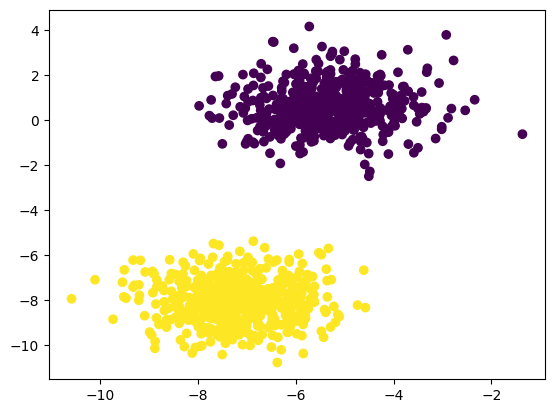

In [2]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

Ahora dividiremos el dataset en pruebas y entrenamiento, con un valor de 0.4 para las pruebas (40% del dataset). Una vez teniendo la división, vamos a crear la red neuronal con la misma estructura que toda la clase: 4 neuronas en capa 1, 2 neuronas en capa 2. Si bien es cierto deberíamos hacer las neuronas manualmente, necesitamos SKLearn porque todavia no hemos visto como entrenar una neurona.

#### NOTA: El correr esta celda puede llevar un rato! aproximadamente unos 3 o 4 minutos. Preparate un café mientras tanto... 

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)


redNeuronal = MLPClassifier(hidden_layer_sizes=(4,2),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


In [4]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,

### Métricas de desempeño de nuestra Red Neuronal.
Recuerdas la sesión 02? En esta sesión vimos lo que era una matriz de confusión, y como se calcula la Accuracy, sensibilidad y especificidad. Aquí agrego las funciones de la sesión 02 si no las recuerdas.

In [5]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

Ahora, para saber que tan bueno es el modelo, haremos las evaluaciones. Esta red neuronal de 4 neuronas en una capa y 2 en la segunda alcanza muchas veces la clasificación perfecta. (Aunque puede variar por aquello de los números aleatorios...)

In [6]:
resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[207   0]
 [  0 193]]
True positives: 193
True negatives: 207
False positives: 0
False negative: 0
Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%


# Problema de clasificación de vino

In [9]:
from sklearn.datasets import load_wine
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [16]:
data = load_wine()
X = pd.DataFrame(data["data"], columns = data["feature_names"])
y = data["target"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [19]:
redNeuronal = MLPClassifier(hidden_layer_sizes=(2,3),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")
print("Accuracy del modelo: {}".format(accuracy_score(y_test, y_pred)))

Entrenamiento completado!
Accuracy del modelo: 0.9722222222222222
